# Lab7 RegEx

_TA:Xiangbo Mo_
    
_11/15/2023_

# RegEx

A **RegEx**, or **Regular Expression**, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

In [1]:
import re

In [2]:
txt = "To be, or not to be, that is the question.\n"

## 1 RegEx Functions

`findall()` returns a list containing all matches.

In [3]:
# return a list containing every occurrence of "be"
re.findall("be", txt)

['be', 'be']

`search()` searches the string for a match, and returns a Match object if there is a match. If there is more than one match, only the first occurrence of the match will be returned.

The Match object has properties and methods used to retrieve information about the search.

- `.start()` return the start position of the match

- `.end()` return the end position of the match

- `.span()` returns a tuple containing the start-, and end positions of the match

- `.string` returns the string passed into the function

- `.group()` returns the part of the string where there was a match


In [4]:
# find the start and end position of the word "question"
re.search("question", txt).span()

(33, 41)

In [5]:
re.search("question", txt).string

'To be, or not to be, that is the question.\n'

In [6]:
re.search("question", txt).group()

'question'

`split()` function returns a list where the string has been split at each match

In [7]:
# split the string at every comma, period, and newline character
re.split("[,.\n]", txt)

['To be', ' or not to be', ' that is the question', '', '']

`sub()` function replaces the matches with the text of your choice

In [8]:
# replace all commas with newline character
re.sub(",", "\n", txt)

'To be\n or not to be\n that is the question.\n'

## 2 Metacharacters

Metacharacters are characters with a special meaning.

- `[]`: A set of characters

*Note*: In sets, `+`, `*`, `.`, `|`, `()`, `{}` has no special meaning.

In [9]:
# find all lower case characters between "a" and "e", comma ",", period "." and newline character "\n"
re.findall("[a-e,.\n]", txt)

['b', 'e', ',', 'b', 'e', ',', 'a', 'e', 'e', '.', '\n']

In [10]:
# find all matches that are not lower case characters between "a" and "e", comma ",", period ".", newline character "\n"
re.findall("[^a-e,.\n]", txt)

['T',
 'o',
 ' ',
 ' ',
 'o',
 'r',
 ' ',
 'n',
 'o',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 't',
 'h',
 't',
 ' ',
 'i',
 's',
 ' ',
 't',
 'h',
 ' ',
 'q',
 'u',
 's',
 't',
 'i',
 'o',
 'n']

- `.`: Any character (except newline character `\n`)

In [11]:
# search for a sequence that starts with "qu", followed by 2 (any) characters, and ends with "tion"
re.findall("qu..tion", txt)

['question']

- `*`: Zero or more occurrences

- `+`: One or more occurrences

- `?`: Zero or one occurrence

- `{}`: Exactly the specified number of occurrences

In [12]:
# search for a sequence that starts with "qu", followed by 0 or more (any) characters, and ends with "tion"
re.findall("qu.*tion", txt)

['question']

In [13]:
# search for a sequence that starts with "qu", followed by 1 or more (any) characters, and ends with "tion"
re.findall("qu.+tion", txt)

['question']

In [14]:
# search for a sequence that starts with "qu", followed by 0 or 1 (any) character, and ends with "tion"
re.findall("qu.?tion", txt)

[]

In [15]:
# search for a sequence that starts with "qu", followed by 2 (any) characters, and ends with "tion"
re.findall("qu.{2}tion", txt)

['question']

- `|`: Either or

In [16]:
# search for "this", "that", or "the"
re.findall("this|that|the", txt)

['that', 'the']

- `()`: Group constructs

    + `(...)`: A _capturing group_ allows you to match a group and capture it in the result.
    
    + `(?:...)`: A _non-capturing group_ allows you to match a group without including it in the result.
    
    + `(?=...)`: A _positive lookahead_ allow you to match a group after the main expression without including it in the result.
    
    + `(?!...)`: A _negative lookahead_ specifies a group that can not be matched after the main expression.
    
    + `(?<=...)`: A _positive lookbehind_ allow you to match a group before the main expression without including it in the result.
    
    + `(?<!...)`: A _negative lookbehind_ specifies a group that can not be matched before the main expression.

In [17]:
# match and return "To be" and "not to be"
re.findall("(To be).*(not to be)", txt)

[('To be', 'not to be')]

In [18]:
# match and return "To be", match but not return "not to be"
re.findall("(To be).*(?:not to be)", txt)

['To be']

In [19]:
# find the word before the period 
re.findall("(\w+)(?=\.)", txt) 

['question']

In [20]:
# find the part of string that starts with "be" where this "be" is not following "To "
re.findall("(?<!To )(be.*\n)", txt)

['be, that is the question.\n']

## 3 Special Sequences

A special sequence is a `\` followed by one of the characters, and has a special meaning.

`\d` returns a match where the string contains digits (0-9)

`\D` returns a match where the string does not contain digits

In [21]:
# find all digits 
re.findall("\d", "Vincent van Gogh was born in 1853.")

['1', '8', '5', '3']

`\s` returns a match where the string contains a whitespace character (equivalent to `[\r\n\t\f\v ]`)

`\S` returns a match where the string does not contain a whitespace character

In [22]:
# find all whitespace characters
re.findall("\s", txt)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '\n']

`\w` returns a match where the string contains any word character (characters from "a" to "z", "A" to "Z", digits 0-9, and the underscore character "_")

`\W` returns a match where the string does not contain any word character

In [23]:
# find all word characters
re.findall("\w", "Vincent van Gogh was born in 1853.")

['V',
 'i',
 'n',
 'c',
 'e',
 'n',
 't',
 'v',
 'a',
 'n',
 'G',
 'o',
 'g',
 'h',
 'w',
 'a',
 's',
 'b',
 'o',
 'r',
 'n',
 'i',
 'n',
 '1',
 '8',
 '5',
 '3']

## 4 Greedy and Lazy

In [24]:
txt2 = 'a "witch" and her "broom" is one'

### Greedy mode

In the greedy mode (by default) a quantified character is repeated as many times as possible.

In [25]:
re.findall('"(.+)"', txt2)

['witch" and her "broom']

In [26]:
from IPython.display import SVG

def show_svg(url):
    return SVG(url)

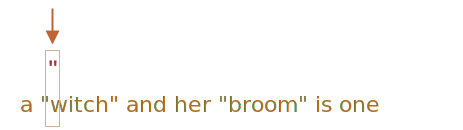

In [27]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy1.svg")

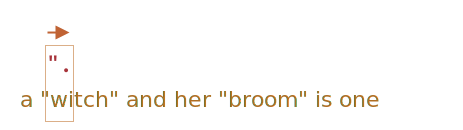

In [28]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy2.svg")

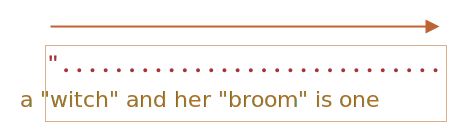

In [29]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy3.svg")

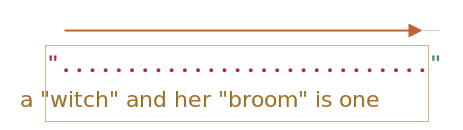

In [30]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy4.svg")

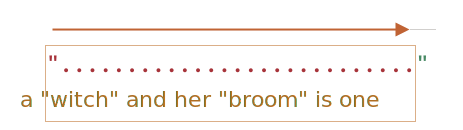

In [31]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy5.svg")

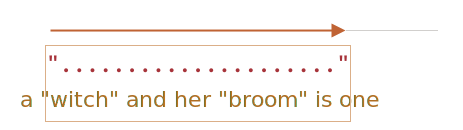

In [32]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy6.svg")

### Lazy mode

The lazy mode of quantifiers is an opposite to the greedy mode. It means: "repeat minimal number of times".

We can enable it by putting a question mark `?` after the quantifier, so that it becomes `*?` or `+?` or even `??`.

In [33]:
re.findall('"(.+?)"', txt2)

['witch', 'broom']

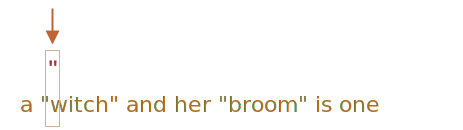

In [34]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy1.svg")

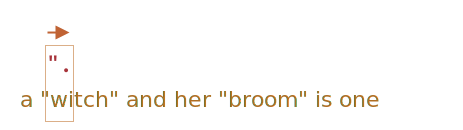

In [35]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_greedy2.svg")

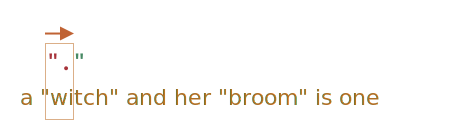

In [36]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_lazy3.svg")

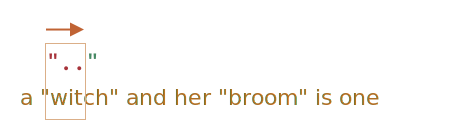

In [37]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_lazy4.svg")

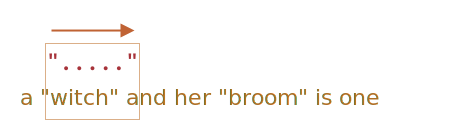

In [38]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_lazy5.svg")

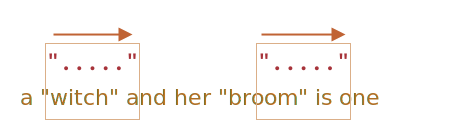

In [39]:
show_svg("https://javascript.info/article/regexp-greedy-and-lazy/witch_lazy6.svg")